# Loan Approval Prediction Project


### Import packages

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [40]:
# For better plot display
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

### Read dataset

In [41]:
df = pd.read_csv("LoanApprovalPrediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Check if there any null values exists

In [42]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##  Data Cleaning and Preparation

In [44]:
df.drop(['Loan_ID'], axis=1, inplace=True)

### Fill the missing values

In [45]:
fill_mode=['Gender','Married','Dependents','Self_Employed','Credit_History']
for col in fill_mode:
    df[col]=df[col].fillna(df[col].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

# Confirm missing values are handled
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [46]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


### Check all the features are in numeric

In [47]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Exploratory Data Analysis (EDA)

### Count plot of Loan Status

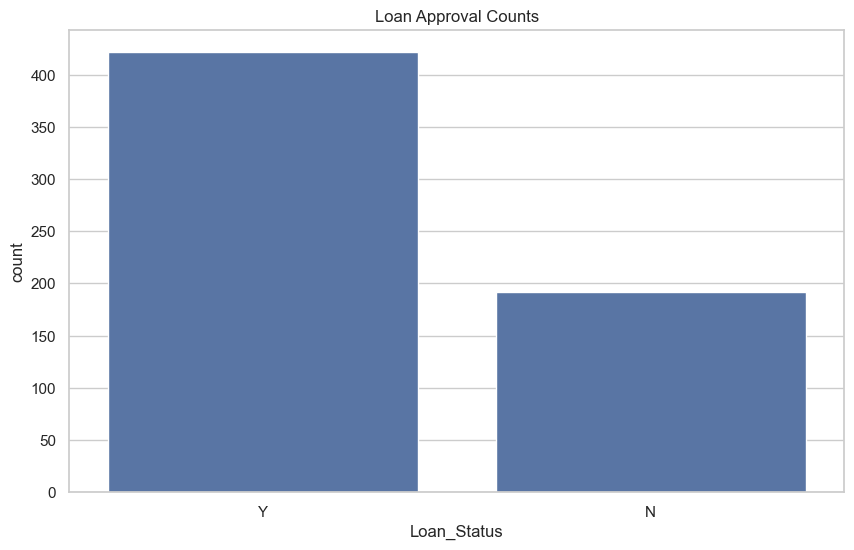

In [48]:
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Approval Counts")
plt.show()

##### This graph shows that most of the loan applications are approved. The number of approvals (`Loan_Status = Y`) is higher than the number of rejections. This tells us that the dataset is slightly imbalanced.


### Gender vs Loan Status

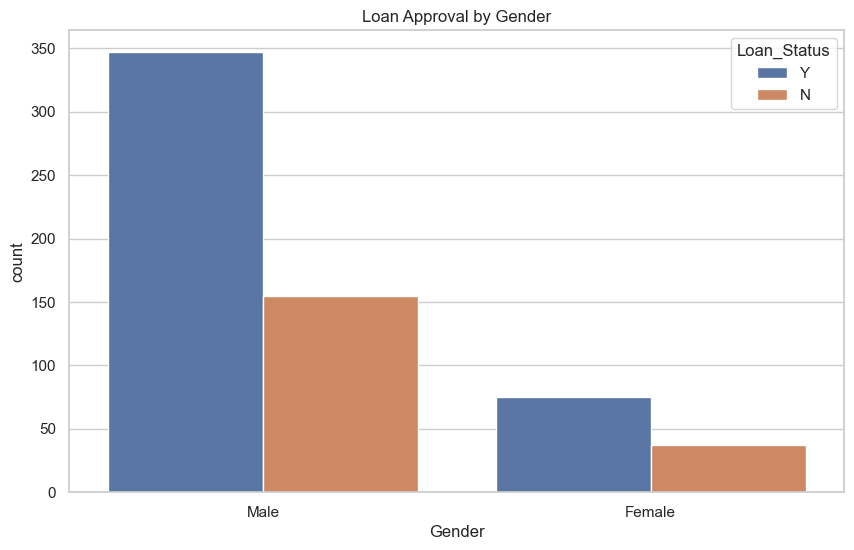

In [49]:
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title("Loan Approval by Gender")
plt.show()


##### From this graph, we can see that both male and female applicants are getting loans, but the number of male applicants is more. Approval rates for both genders look similar, so gender might not affect loan approval much.


### Education vs Loan Status

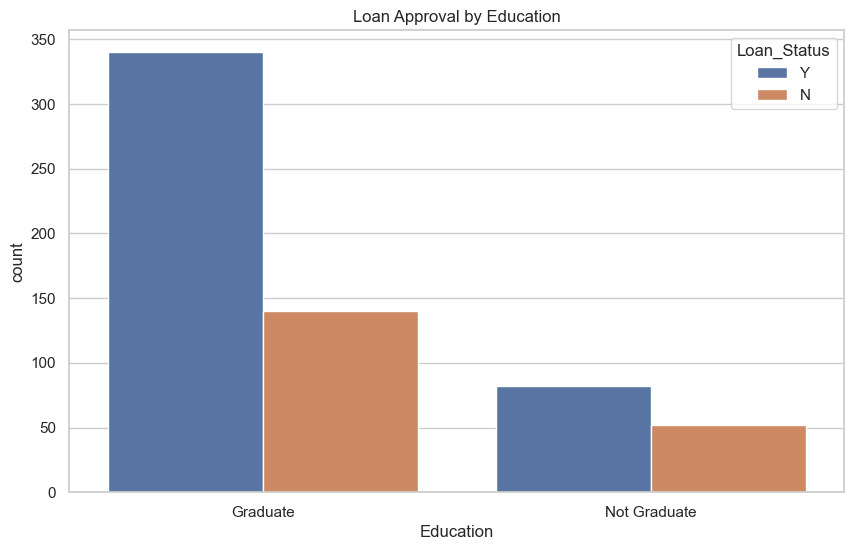

In [50]:
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title("Loan Approval by Education")
plt.show()

##### This graph shows that graduate applicants are more in number and have slightly more loan approvals than non-graduates. But both groups are getting approvals, so education may not have a strong impact.


### Credit History vs Loan Status

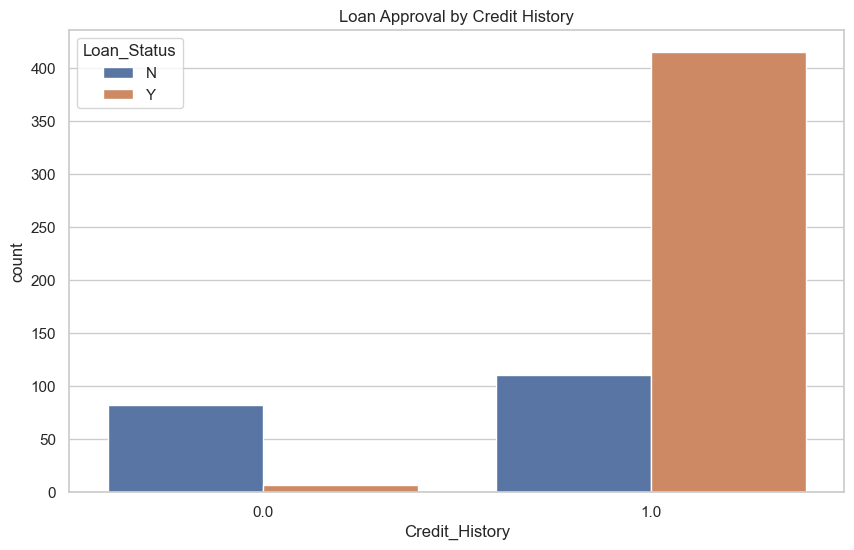

In [51]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title("Loan Approval by Credit History")
plt.show()

##### This graph clearly shows that people with a good credit history (`Credit_History = 1`) are much more likely to get their loans approved. So, credit history is a very important factor for loan approval.


###  Convert categorical columns using LabelEncoder

In [52]:
encoder=LabelEncoder()
labels = df.select_dtypes(include='object')
for label in labels:
    df[label]=encoder.fit_transform(df[label])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


### Correlation heatmap

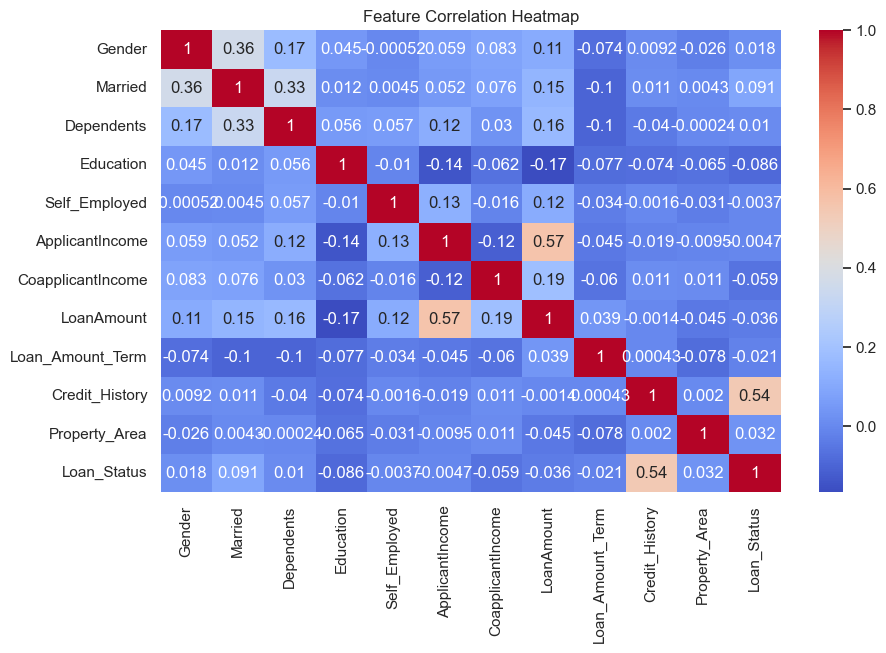

In [53]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

##### From the heatmap, we can see that `Credit_History` has the highest correlation with `Loan_Status`, which means it strongly affects loan approval. Other features like `ApplicantIncome` and `LoanAmount` have weaker correlations.


## Feature Selection and Modeling

### Split into features and target

In [54]:
X=df.iloc[:,:-1]
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [55]:
y=df.iloc[:,-1]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

### Scale features

In [56]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[1.        , 0.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        1.        ],
       [1.        , 1.        , 0.66666667, ..., 0.74358974, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.74358974, 0.        ,
        0.5       ]])

### split features and target for training and testing



In [57]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.5,random_state=1)

## Model creation and test performance

In [58]:
knn=KNeighborsClassifier(n_neighbors=3)
sv=SVC()
rfc= RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
gnb=GaussianNB()
dtc=DecisionTreeClassifier(criterion='entropy',random_state=1)



models = {
    "K-Nearest Neighbors": knn,
    "Support Vector Classifier": sv,
    "Random Forest":rfc,
    "GaussianNB": gnb,
    "Decision Tree Classifier":dtc
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"Model: {name}")
    print(classification_report(y_test, preds))
    print(f"Accuracy: {acc*100:.2f}%\n")

Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.63      0.49      0.55        98
           1       0.78      0.87      0.82       209

    accuracy                           0.75       307
   macro avg       0.71      0.68      0.69       307
weighted avg       0.74      0.75      0.74       307

Accuracy: 74.59%

Model: Support Vector Classifier
              precision    recall  f1-score   support

           0       0.91      0.43      0.58        98
           1       0.79      0.98      0.87       209

    accuracy                           0.80       307
   macro avg       0.85      0.70      0.73       307
weighted avg       0.83      0.80      0.78       307

Accuracy: 80.46%

Model: Random Forest
              precision    recall  f1-score   support

           0       0.83      0.51      0.63        98
           1       0.81      0.95      0.87       209

    accuracy                           0.81       307
   macro av

## Model Comparison Visualization

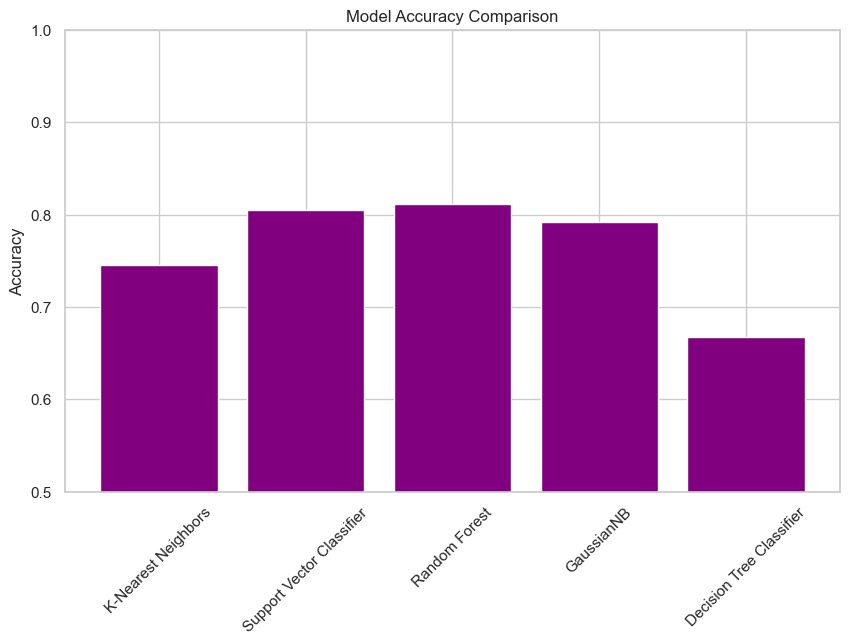

In [59]:
plt.bar(results.keys(), results.values(), color='purple')
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylim(0.5, 1.0)
plt.show()

In [60]:
import pickle
pickle.dump(rfc,open('rfcmodel.sav','wb'))

In [61]:
pickle.dump(scaler,open('scaler_loan.sav','wb'))


In [62]:
import warnings
warnings.filterwarnings('ignore')

y_new=rfc.predict(scaler.transform([[0,0,0,0,1,4583	,0.0,133.000000,360.0,0.0,1]]))
if y_new==0:
  print("no")
else:
  print("yes")

no


### Insights and Conclusion

#### Based on accuracy and classification report:
#### - Random Forest  generally perform well.
#### - Credit History has a major impact on loan approval.
#### - Visual patterns suggest education and employment status also contribute.